# Sobre el uso de vectores en capas

**TL;DR** En este notebook recopilo algunas notas sobre el comportamiento de `amoead10.py` con vectores distribuidos en capas. Parece que las capas no sirven para conservar la diversidad.

Changeset:   338

# Vectores en capas

La siguiente figura muestra la diferencia entre los dos conjuntos de vectores de referencia. En (A) se defiene dos capas, una con 55 y otra con 36 vectores, mientras que en (B) ambas capas se encuentran en una sola.

(load_rcparams) figsize: (8, 6), you can use (12, 5), (8, 6)


<IPython.core.display.Javascript object>


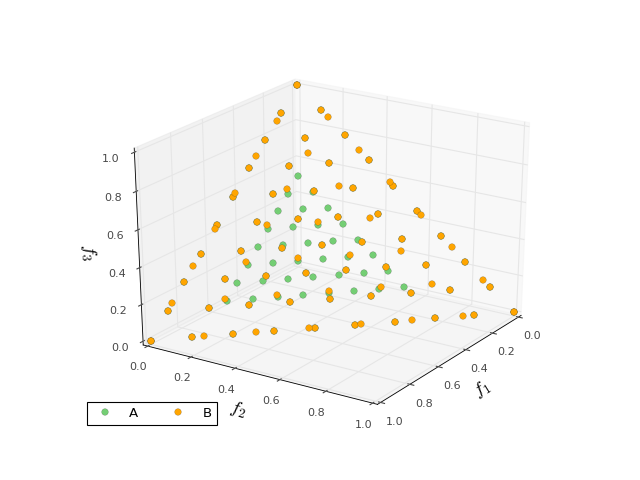

In [1]:
%matplotlib nbagg
from __future__ import print_function
import numpy as np
from rocket.plot import load_rcparams, plot_pops

load_rcparams()

test_a = np.genfromtxt("test_a_weights_m_3_91.txt")  # 91 vectores, dos capas
test_b = np.genfromtxt("test_b_weights_m_3_91.txt")  # 91 vectores, una capa

pops = (test_a, test_b)
labels = ("A", "B")
plot_pops(pops, labels);


# Expansión en capas

(load_rcparams) figsize: (8, 6), you can use (12, 5), (8, 6)


<IPython.core.display.Javascript object>


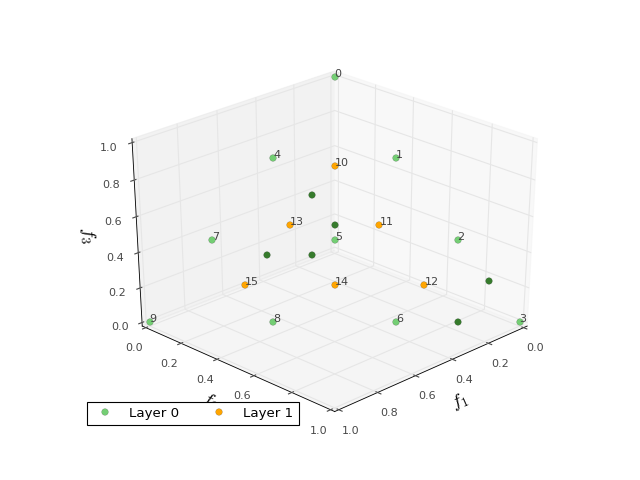

# of vectors around 13: 4
# of vectors around 3: 2


In [1]:
# expansion_layers.py
%matplotlib nbagg
from __future__ import print_function
import numpy as np
from rocket.plot import load_rcparams, plot_pops

# expansion_layers.py
from __future__ import print_function
from rocket.moea import MOEAD
from rocket.moea.amoead.expansion import expand_ext
from rocket.moea.amoead.associate import associate, associate_ext, associate_frontend
from rocket.moea.amoead.normalize import norm_matrix
from rocket.moea.amoead.utility import utility_matrix
from rocket.moea.amoead.sort_subproblems import sort_subproblems_frontend
from rocket.moea.amoead.replacement import replacement

from rocket.plot import load_rcparams, colors, basecolors, plot_pops
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import os

def expand_weights_p(center_ids, weights, expansion_p, layer_indices):
    
    final_weights = weights.copy()
    final_counter = None
    scales = (0.5, 0.25)
    
    final_counter = { ind: 0 for ind in center_ids }        # todos inician con cero
    
    for i, p in enumerate(expansion_p):
        
        to_keep = np.where(layer_indices == i)[0]
        
        w = weights[to_keep]                        # vectors from i-th layer
        
        # filtro, solo los que estan indices de center_ids que estan en to_keep
        to_expand = np.array([ ind for ind in center_ids if ind in to_keep ])
        
        if len(to_expand) > 0:
        
            # create new weights
            new_weights, new_counter = expand_ext(to_expand, final_weights.copy(), p, scale=scales[i])
            
            final_weights = new_weights.copy()
            
            for j, ind in enumerate(to_expand):
                
                final_counter[ind] = new_counter[j]
            
            
    final_counter = np.array([ final_counter[ind] for ind in center_ids ])  # conversion de dict a array en orden
            
    return final_weights.copy(), final_counter.copy()
    
def plot_layers(weights, layer_indices):
    
    vals = np.unique(layer_indices)
    
    pops = []
    labels = []
    
    # get layers
    for i in vals:
        
        indices = np.where(layer_indices == i)
        w = weights[indices]
        
        label = "Layer %d" % i
        
        pops.append(w.copy())
        labels.append(label)
      
    # plot layers
    fig, ax = plot_pops(pops, labels)
    
    # plot ids
    for i, v in enumerate(weights):
        
        x, y, z = v
        
        ax.text(x, y, z, str(i), color="#404040")
        
    plt.show()

def plot_expansion(weights, new_weights):
    
    pops = []
    labels = []
   
    pops = (new_weights, weights)
    labels = ("B", "A")
      
    # plot layers
    fig, ax = plot_pops(pops, labels)
    
    # plot ids
    for i, v in enumerate(weights):
        
        x, y, z = v
        
        ax.text(x, y, z, str(i), color="#404040")
        
    plt.show()
    
def plot_expansion(weights, new_weights, layer_indices, center_ids, counter, save=False):
    
    pops = []
    labels = []
    
    for i in (0, 1):            # layer ids
        
        to_keep = np.where(layer_indices == i)[0]
        w = weights[to_keep]
        label = "Layer %d" % i
        
        pops.append(w.copy())
        labels.append(label)
        
    # plot original weights
    fig, ax = plot_pops(pops, labels)
    
    # plot ids
    for i, v in enumerate(weights):
        
        x, y, z = v
        
        ax.text(x, y, z, str(i), color="#404040", size=10)
    
    
    # plot new weights
    ncolors = ("#D67922", "#367B2C")
    n_weights = weights.shape[0]
    start, end = n_weights, 0
    for i, ind in enumerate(center_ids):
        
        count = counter[i]
        
        end = start + count
        
        w = new_weights[start:end, :]
        
        start = end
        
        
        ax.plot(w[:, 0], w[:, 1], w[:, 2], c=ncolors[1], 
            mec=basecolors["almost_black"], ls="none", marker="o", markeredgewidth=0.15)
    
    
        print("# of vectors around %d: %d" % (ind, count))
    
    
    if save:
        fig.savefig("expansion_layers.png", dpi=300, bbox_inches="tight")
    
    
    plt.show()
    

if __name__ == "__main__":
    
    load_rcparams()
    
    weights = np.genfromtxt("weights_m_3_16_zeros.txt")
    layer_indices = np.genfromtxt("weights_m_3_16_ids.txt", dtype=int)
    
    #plot_layers(weights, layer_indices)
    
    #center_ids = np.array([0, 2, 8, 10, 12, 14])
    center_ids = np.array([0, 2, 8, 10, 12, 14])
    center_ids = np.array([5])
    #center_ids = np.array([13])
    center_ids = np.array([13, 3])
    expansion_p = (3, 2)
    new_weights, counter = expand_weights_p(center_ids, weights, expansion_p, layer_indices)


    plot_expansion(weights, new_weights, layer_indices, center_ids, counter, save=False)
    
    
    



La figura anterior muestra cómo se realiza la expansión en vectores distribuidos en dos capas. En ese caso, se han expandido los vectores 13 (4 vectores) y 3 (2 vectores). Es una prueba de concepto. La función `expand_weights_p` se agregó a `amoead10.py` para hacer la expansión por capas (aunque parece que sólo expande la capa exterior).

# Experimentacion
El siguiente bloque permite evaluar `amoead10.py` en DTLZ1, DTLZ1-spin con los conjuntos (A) y (B).

(load_rcparams) figsize: (8, 6), you can use (12, 5), (8, 6)
experiment path: /media/data/compare10/compare10
t: 7, expansion, new vectors: 0, total vectors: 91, center_ids: [71]
t: 11, expansion, new vectors: 12, total vectors: 103, center_ids: [24 43]
t: 25, expansion, new vectors: 6, total vectors: 109, center_ids: [36]
t: 27, expansion, new vectors: 6, total vectors: 115, center_ids: [37]
t: 37, expansion, new vectors: 6, total vectors: 121, center_ids: [41]
t: 68, expansion, new vectors: 6, total vectors: 127, center_ids: [42]
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300


<IPython.core.display.Javascript object>


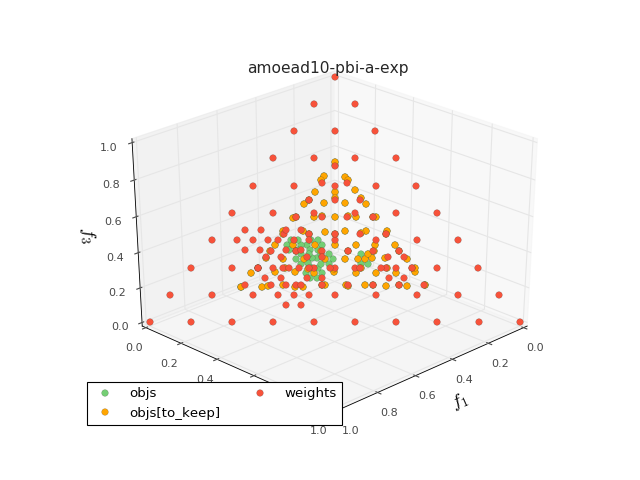

objs: /media/data/compare10/compare10/dtlz1/amoead10-pbi-a-exp/pops/objs_amoead10-pbi-a-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


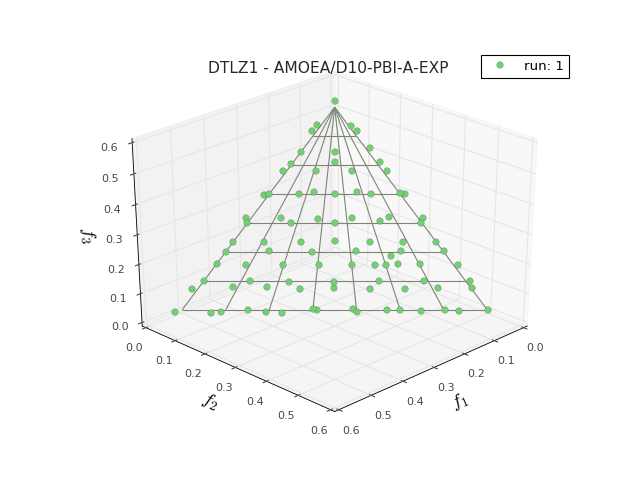

experiment path: /media/data/compare10/compare10
t: 2, expansion, new vectors: 6, total vectors: 97, center_ids: [37 78]
t: 3, expansion, new vectors: 6, total vectors: 103, center_ids: [36]
t: 5, expansion, new vectors: 6, total vectors: 109, center_ids: [42]
t: 6, expansion, new vectors: 6, total vectors: 115, center_ids: [29]
t: 7, expansion, new vectors: 6, total vectors: 121, center_ids: [21]
t: 8, expansion, new vectors: 6, total vectors: 127, center_ids: [23]
t: 10, expansion, new vectors: 6, total vectors: 133, center_ids: [43 73]
t: 21, expansion, new vectors: 6, total vectors: 139, center_ids: [15]
t: 33, expansion, new vectors: 6, total vectors: 145, center_ids: [22]
t: 34, expansion, new vectors: 6, total vectors: 151, center_ids: [38]
t: 39, expansion, new vectors: 6, total vectors: 157, center_ids: [14]
t: 48, expansion, new vectors: 6, total vectors: 163, center_ids: [13]
t: 52, expansion, new vectors: 6, total vectors: 169, center_ids: [31]
t: 53, expansion, new vectors

<IPython.core.display.Javascript object>


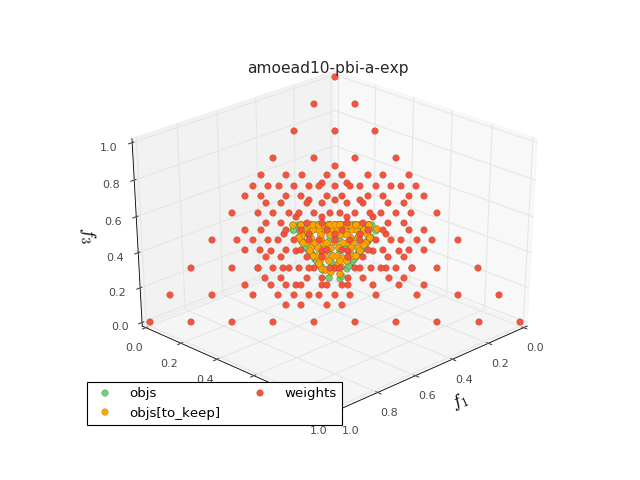

objs: /media/data/compare10/compare10/dtlz1-spin/amoead10-pbi-a-exp/pops/objs_amoead10-pbi-a-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


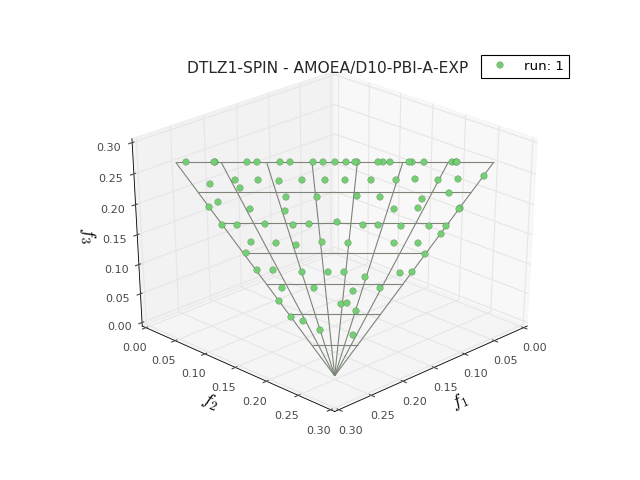

experiment path: /media/data/compare10/compare10
t: 6, expansion, new vectors: 0, total vectors: 91, center_ids: [71]
t: 19, expansion, new vectors: 6, total vectors: 97, center_ids: [36]
t: 20, expansion, new vectors: 0, total vectors: 97, center_ids: [78]
t: 25, expansion, new vectors: 6, total vectors: 103, center_ids: [42]
t: 30, expansion, new vectors: 0, total vectors: 103, center_ids: [67]
t: 34, expansion, new vectors: 0, total vectors: 103, center_ids: [83]
t: 40, expansion, new vectors: 6, total vectors: 109, center_ids: [37]
t: 46, expansion, new vectors: 0, total vectors: 109, center_ids: [79]
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300


<IPython.core.display.Javascript object>


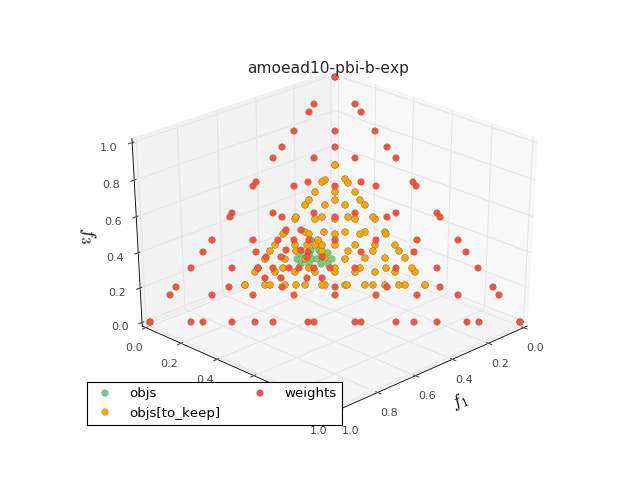

objs: /media/data/compare10/compare10/dtlz1/amoead10-pbi-b-exp/pops/objs_amoead10-pbi-b-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


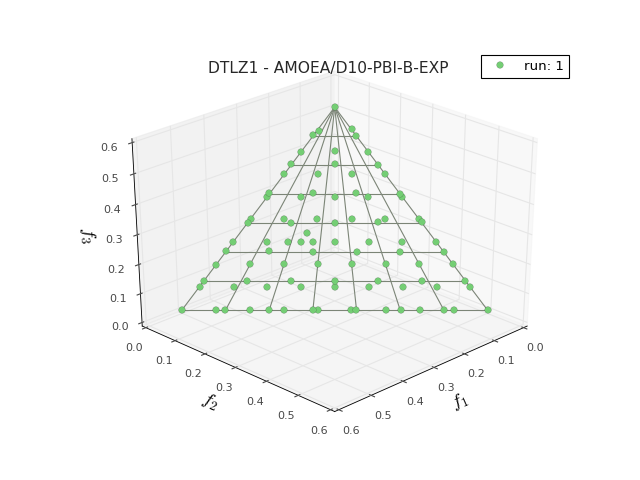

experiment path: /media/data/compare10/compare10
t: 2, expansion, new vectors: 18, total vectors: 109, center_ids: [36 37 38 79]
t: 3, expansion, new vectors: 6, total vectors: 115, center_ids: [23]
t: 6, expansion, new vectors: 6, total vectors: 121, center_ids: [32 72]
t: 8, expansion, new vectors: 6, total vectors: 127, center_ids: [29]
t: 9, expansion, new vectors: 6, total vectors: 133, center_ids: [21]
t: 10, expansion, new vectors: 6, total vectors: 139, center_ids: [22]
t: 11, expansion, new vectors: 6, total vectors: 145, center_ids: [14 78]
t: 14, expansion, new vectors: 6, total vectors: 151, center_ids: [13]
t: 18, expansion, new vectors: 0, total vectors: 151, center_ids: [66]
t: 19, expansion, new vectors: 6, total vectors: 157, center_ids: [42]
t: 29, expansion, new vectors: 6, total vectors: 163, center_ids: [31]
t: 56, expansion, new vectors: 0, total vectors: 163, center_ids: [73]
t: 59, expansion, new vectors: 6, total vectors: 169, center_ids: [24]
t: 66, expansion,

<IPython.core.display.Javascript object>


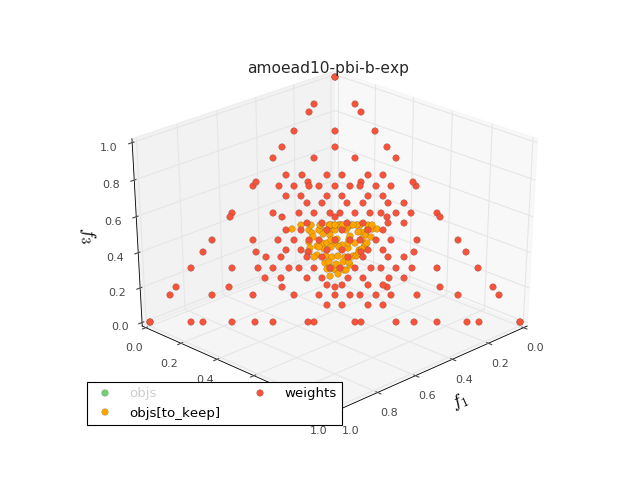

objs: /media/data/compare10/compare10/dtlz1-spin/amoead10-pbi-b-exp/pops/objs_amoead10-pbi-b-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


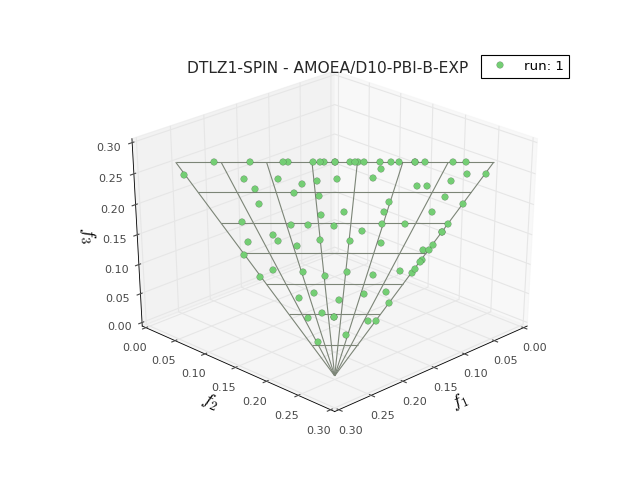

experiment path: /media/data/compare10/compare10
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300
objs: /media/data/compare10/compare10/dtlz1/amoead10-pbi-a-no-exp/pops/objs_amoead10-pbi-a-no-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


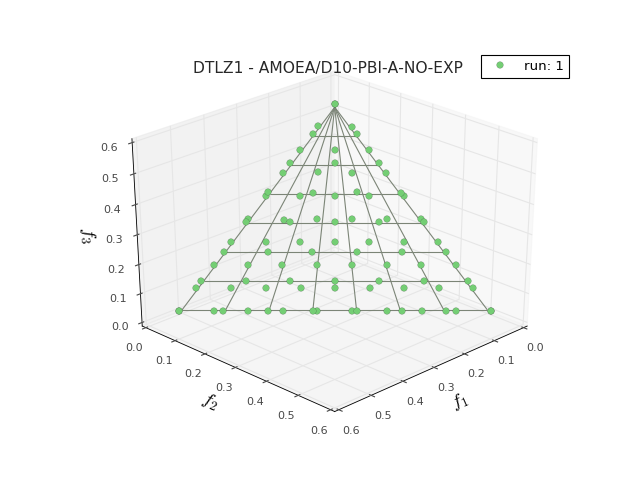

experiment path: /media/data/compare10/compare10
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300
objs: /media/data/compare10/compare10/dtlz1-spin/amoead10-pbi-a-no-exp/pops/objs_amoead10-pbi-a-no-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


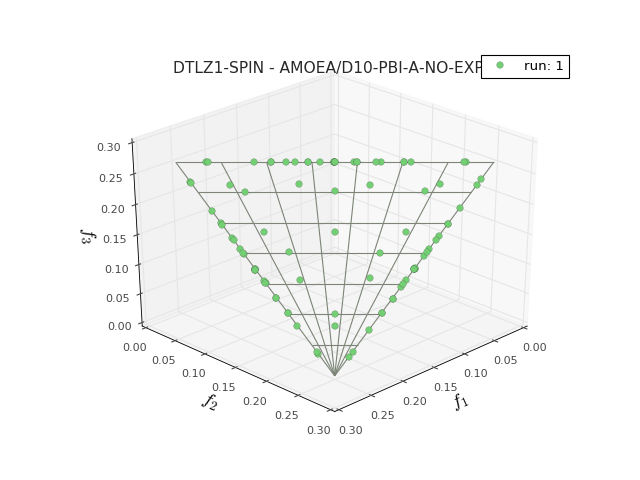

experiment path: /media/data/compare10/compare10
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300
objs: /media/data/compare10/compare10/dtlz1/amoead10-pbi-b-no-exp/pops/objs_amoead10-pbi-b-no-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


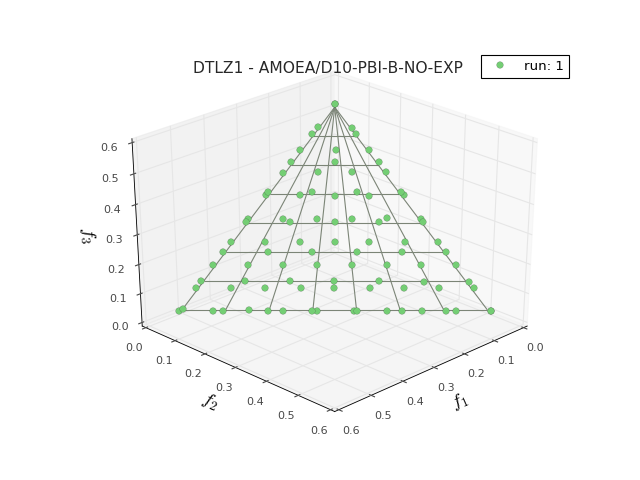

experiment path: /media/data/compare10/compare10
t: 100  fevals: 9100
t: 200  fevals: 18200
t: 300  fevals: 27300
objs: /media/data/compare10/compare10/dtlz1-spin/amoead10-pbi-b-no-exp/pops/objs_amoead10-pbi-b-no-exp_m_3_run_0_final.txt
run 1/1, fevals: 27300



<IPython.core.display.Javascript object>


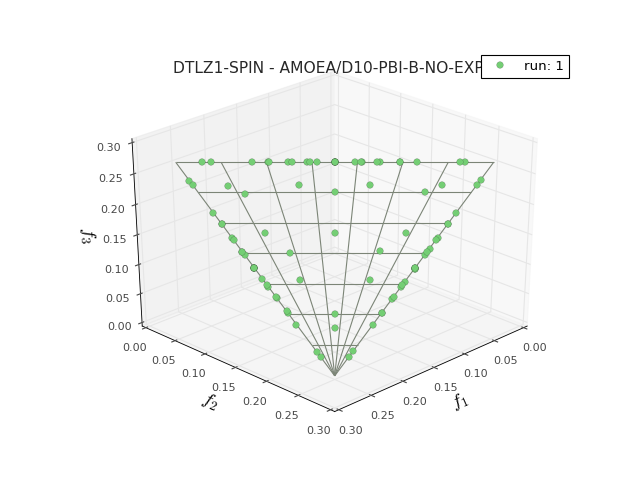

In [3]:
# compare10.py
%matplotlib nbagg
from __future__ import print_function
import numpy as np
from rocket.plot import load_rcparams, plot_pops

from rocket.moea import AMOEAD10, MOEAD
from rocket.helpers import get_n_genes, get_bounds
from rocket.labs import get_experiment_path
import numpy as np
import os


load_rcparams()


# define experiment output path
script_path = "/media/data/compare10"
output_path = get_experiment_path(script_path, name="compare10")

    
if __name__ == "__main__":
    
    
    # mop_name, iters, params_form
    # uncomment for testing
    configs = (
        ("dtlz1",       300, {"name": "pbi", "pbi-theta": 5}), 
        ("dtlz1-spin",  300, {"name": "pbi", "pbi-theta": 5}), 
        #("inv-dtlz1",   500, {"name": "pbi", "pbi-theta": 5}), 
        #("min-dtlz1",   300, {"name": "asf", "asf-z_ref": np.array([0., 0., 0.])}),    # no funciono
        #("min-dtlz1",   300, {"name": "asf", "asf-z_ref": np.array([0., 0., 0.])}),    # no funciono
        #("min-dtlz1",   300, {"name": "pbi", "pbi-theta": 5}), 
        )
        
        
    for use_expansion in (True, False):
    
        for weights_type in ("a", "b"):
            
            weights         = np.genfromtxt("test_%s_weights_m_3_91.txt" % weights_type)      # una sola capa
            layer_indices   = np.genfromtxt("test_%s_weights_m_3_91_ids.txt" % weights_type, dtype=int)        # todos pertenecen a la capa 0
            pop_size, m_objs = weights.shape
            

            for config in configs:
            
                mop_name, iters, params_form = config
                n_genes, wfg_k, wfg_l = get_n_genes(mop_name, m_objs)
            
            
                params = {
                    "runs"              : 1,                                                        # number of independent runs
                    "iters"             : iters,                                                    # number of generations
                    "m_objs"            : m_objs,                                                   # number of objectives
                    "pop_size"          : pop_size,                                                 # number of individuals
                    "params_mop"        : {"name": mop_name, "k": wfg_k, "degrees":180},            # mop parameters
                    "params_crossover"  : {"name": "sbx", "prob": 1.0, "eta": 20},                  # crossover parameters
                    "params_mutation"   : {"name": "polymutation", "prob": 1./n_genes, "eta": 15},  # mutation parameters
                    "params_stats"      : {"output_path": output_path},                             # stats parameters
                    "verbose"           : True,                                                     # log verbosity
                    
                    # MOEAD params
                    "neigh_size"        : 20,
                    "pop_weights"       : weights,
                    "params_form"       : params_form,
                    
                }
                
                use_exp = "exp" if use_expansion else "no-exp"
                
                params["name"]       = "amoead10-%s-%s-%s"  % (params_form["name"], weights_type, use_exp)
                params["label"]      = "AMOEA/D10-%s-%s-%s" % (params_form["name"].upper(), weights_type.upper(), use_exp.upper())
                params["amoead_association_a_type"] = "hierarchy"
                params["amoead_association_b_type"] = "hierarchy"
                params["amoead_association_c_type"] = "nearest"             # debe ser nearest en lugar de hierarchy
                params["amoead_association_a_norm"] = False
                params["amoead_association_b_norm"] = False
                params["amoead_association_c_norm"] = False            # debe ser nearest en lugar de hierarchy
                params["amoead_sort_sp_a_type"] = "hierarchy_rand"
                params["amoead_sort_sp_b_type"] = "hierarchy_rand"
                params["amoead_sort_sp_c_type"] = "hierarchy"            # no rand!
                params["amoead_expansion_threshold"] = 10
                params["amoead_use_adaptation"] = use_expansion
                
                params["amoead_expansion_p"] = (12, )
                params["amoead_layer_indices"] = layer_indices.copy()
                
                
                
                # agregar "hierarchy_rand"
                
                amoead = AMOEAD10(params)
                amoead.evaluate(plot_output=True, plot_output_name="", plot_run=True)
                



Observe las últimas figuras (con *NO-EXP*). Recuerde que los conjuntos contienen vectores en capas (ya sea una o dos capas). Sin embargo, aunque se deshabilite la expansión, las soluciones encontradas en DTLZ1 no son buenas en términos de ~~diversidad~~ uniformidad.